In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go 
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# 1、加载数据

In [2]:
df = pd.read_csv(r'C:\Users\whd\MyProjects\telco_customer_churn-main\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2、探索数据

该份数据包含以下信息：

（一）标签值 ： Churn（用户上月是否发生流失）

（二）特征值：

—— 用户属性 ：  gender, age range, and if they have partners and dependents

—— 服务属性 ： phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

—— 合同属性 ： how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges


In [3]:
'''
# 获取各特征的取值分布情况，将 features 分为三类：服务属性、合同属性、客户属性。

for i in df.columns:
    print('This column is :%s' % i)
    print(df[i].value_counts())
    print('#'*100)
'''

"\n# 获取各特征的取值分布情况，将 features 分为三类：服务属性、合同属性、客户属性。\n\nfor i in df.columns:\n    print('This column is :%s' % i)\n    print(df[i].value_counts())\n    print('#'*100)\n"

In [4]:
'''
从下表发现两个问题：
1、TotalCharges 应转换为数字格式。
2、SeniorCitizen 应映射为字母，转为 object 格式。
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 3、 数据清洗

In [5]:
# （1）删除 customerID 列，对分析数据和结果预测都没用

df.drop(['customerID'], axis=1, inplace=True)

In [6]:
# （2）将 TotalCharges 列由object格式转为 float格式

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
'''
TotalCharges 列转换后，存在11条空值数据
'''

df[df['TotalCharges'].isnull()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

In [8]:
df = df[~df['TotalCharges'].isnull()] # 删除 TotalCharges 中 NAN 的行

In [9]:
df.isnull().sum() # 此时不再有缺失值

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# （3） 对 SeniorCitizen 列进行数值映射，因为 1 !> 0，即老年人不比年轻人“高贵”。因此将其映射为 YES/NO， 进而转为 object 格式。

In [11]:
mapper = {0:'No', 1:'Yes'}

df['SeniorCitizen'] = df['SeniorCitizen'].map(mapper)

In [12]:
df['SeniorCitizen'].value_counts()

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64

In [13]:
# 对连续型特征查看描述性统计

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_cols].describe().T

count         mean          std    min       25%       50%  \
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

# 4、数据可视化

## 4.1、用户属性层面可视化分析

### （1） 绘制用户性别和流失率分布图，探究用户性别与流失率的关系

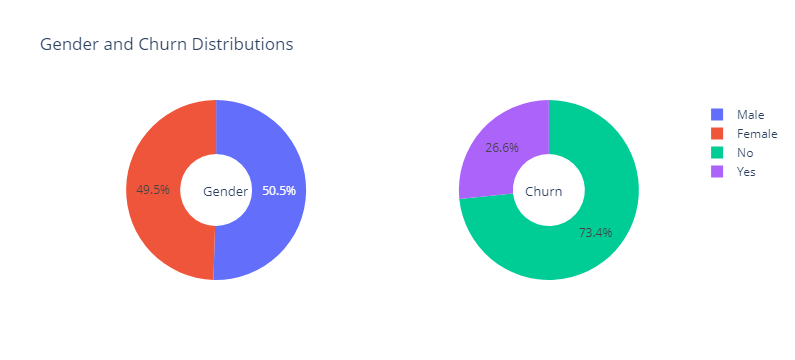

In [14]:

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=['Male', 'Female'], values=df['gender'].value_counts(), name='Gender'),1,1)
fig.add_trace(go.Pie(labels=['No', 'Yes'], values=df['Churn'].value_counts(), name='Churn'), 1, 2)

fig.update_traces(hole=0.4) # 加上一个洞
fig.update_layout(title_text='Gender and Churn Distributions',
                 annotations=[dict(text='Gender', x=.2, y=.5, font_size=13, showarrow=False),
                             dict(text='Churn', x=.8, y=.5, font_size=13, showarrow=False)])

fig.show()


In [15]:
# 未流失客户中，男女占比几乎一致

100 * df[df['Churn'] == 'No'].groupby('gender')['Churn'].count() / df[df['Churn'] == 'No'].groupby('gender')['Churn'].count().sum()

gender
Female    49.273678
Male      50.726322
Name: Churn, dtype: float64

In [16]:
# 流失客户中，男女占比几乎一致

100 * df[df['Churn'] == 'Yes'].groupby('gender')['Churn'].count() / df[df['Churn'] == 'Yes'].groupby('gender')['Churn'].count().sum()

gender
Female    50.24077
Male      49.75923
Name: Churn, dtype: float64

根据上图：

1、总体客户中男女比例差别不大。

2、有约26.6%的客户流失了。

3、性别不是影响客户是否流失的因素。

### （2） 绘制年龄柱形图，探究用户年龄与流失率的关系

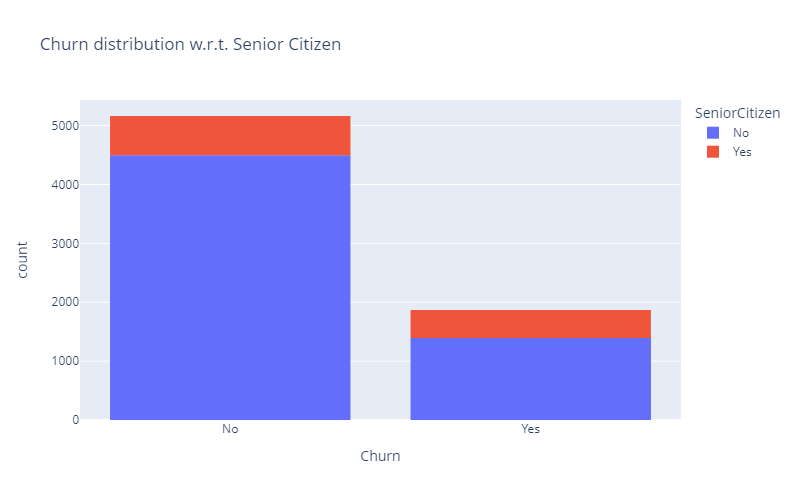

In [17]:
# 通过设置 color，将老年人和非老年人进行分开

fig = px.histogram(df, x='Churn', color='SeniorCitizen',  title='Churn distribution w.r.t. Senior Citizen')
fig.update_layout(width=700,height=500)
fig.show()

In [18]:
# 流失用户中，老年人占比 25.5%

100 * df[df['Churn'] == 'Yes'].groupby('SeniorCitizen')['Churn'].count() / df[df['Churn'] == 'Yes'].groupby('SeniorCitizen')['Churn'].count().sum()

SeniorCitizen
No     74.531835
Yes    25.468165
Name: Churn, dtype: float64

In [19]:
# 未流失用户中，老年人占比 12.9%

100 * df[df['Churn'] == 'No'].groupby('SeniorCitizen')['Churn'].count() / df[df['Churn'] == 'No'].groupby('SeniorCitizen')['Churn'].count().sum()

SeniorCitizen
No     87.100523
Yes    12.899477
Name: Churn, dtype: float64

根据上图：

1、相对于留存用户，流失客户群体中老年用户占比提高了。

2、老年用户更容易流失。

### （3） 绘制客户配偶因素柱形图，探究用户是否有配偶与流失率的关系

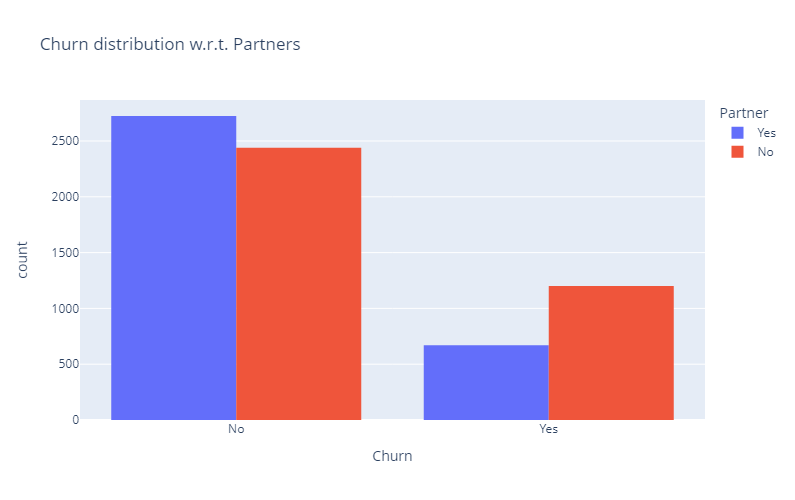

In [20]:
# 设置 barmode='group'，将 partner 为 YES/NO 的图形进行分开
fig = px.histogram(df, x='Churn', color='Partner',  title='Churn distribution w.r.t. Partners', barmode='group')
fig.update_layout(width=700,height=500)
fig.show()

根据上图：

1、留存的客户群体中，有配偶的用户数多于无配偶的用户数量。

2、流失的客户群体中，无配偶的用户数量为1200人，是有配偶流失用户数量的1.79倍。

3、“有无配偶”是用户是否流失的因素，没有配偶的用户更易流失。

### （4） 绘制客户亲属因素柱形图，探究用户是否有亲属与流失率的关系

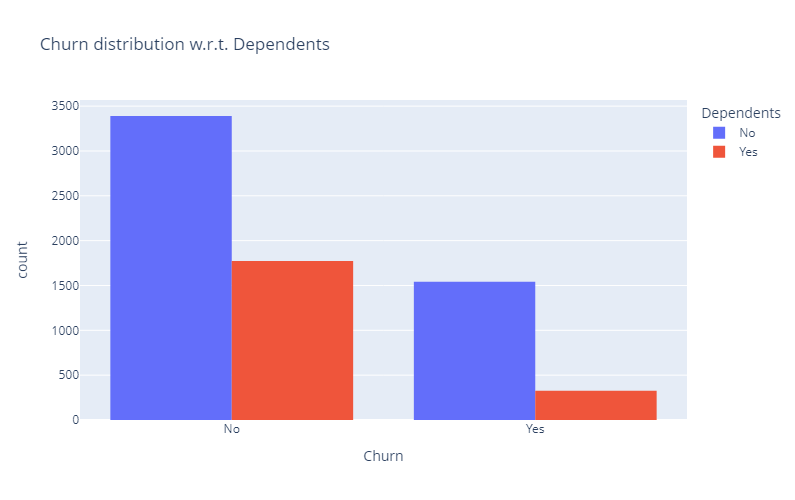

In [21]:
# 设置 barmode='group'，将 partner 为 YES/NO 的图形进行分开
fig = px.histogram(df, x='Churn', color='Dependents',  title='Churn distribution w.r.t. Dependents', barmode='group')
fig.update_layout(width=700,height=500)
fig.show()

根据上图：

1、留存客户群体中，无亲属的人数是有亲属的人数的1.91倍。流失客户群体中，无亲属的人数是有亲属人数的4.73倍。

2、“有无亲属”是影响客户是否流失的因素。

3、没有亲属的客户，更容易流失。

In [22]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 4.2、服务属性层面可视化分析

### （1）客户在公司停留的月数与流失率的关系

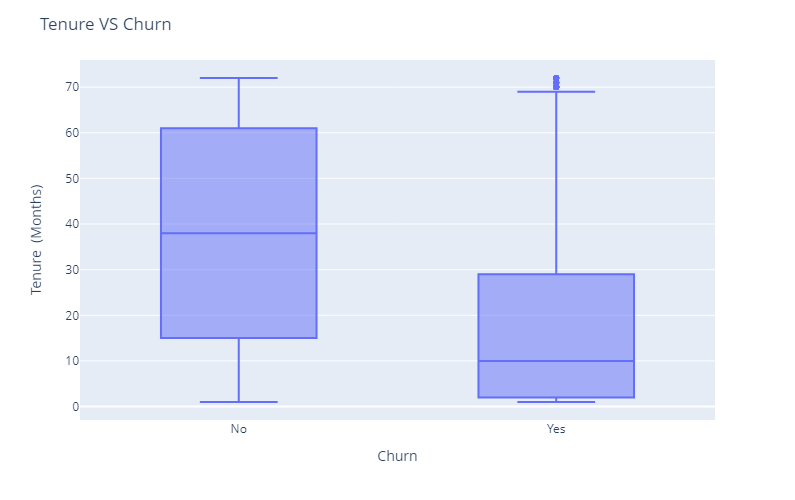

In [23]:
fig = px.box(df, x='Churn', y='tenure')
fig.update_layout(width=700, height=500, title='Tenure VS Churn')
fig.update_yaxes(title_text='Tenure  (Months)')
fig.show()

根据上图：

流失用户群体订购服务的月份中位数=10个月，而留存用户群体订购服务的月份中位数=38个月，新用户更容易流失。

### （2）客户是否有电话服务与流失率之间的关系

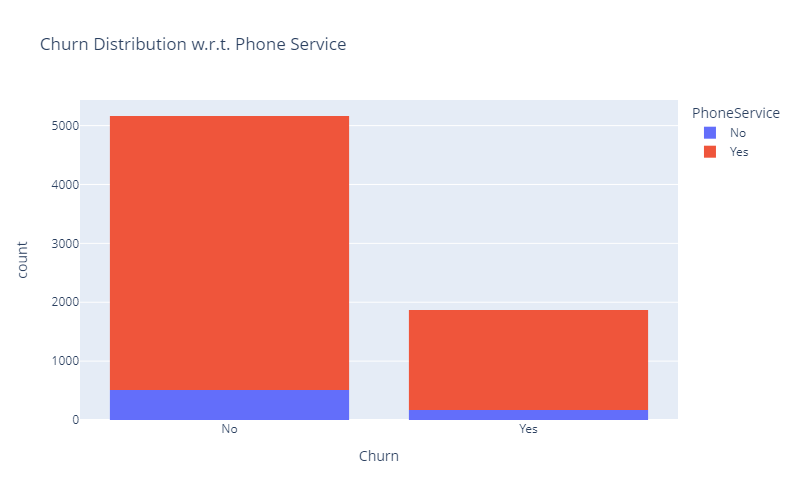

In [24]:
fig = px.histogram(df, x='Churn', color='PhoneService', title='Churn Distribution w.r.t. Phone Service')
fig.update_layout(width=700, height=500)
fig.show()

In [25]:
# —— 流失客户群体中，无电话服务的用户占比为 9.1%

100 * df[df['Churn'] == 'Yes'].groupby('PhoneService')['Churn'].count() / df[df['Churn'] == 'Yes'].groupby('PhoneService')['Churn'].count().sum()

PhoneService
No      9.095773
Yes    90.904227
Name: Churn, dtype: float64

In [26]:
# —— 留存客户群体中，无电话服务的用户占比为 9.9%

100 * df[df['Churn'] == 'No'].groupby('PhoneService')['Churn'].count() / df[df['Churn'] == 'No'].groupby('PhoneService')['Churn'].count().sum()

PhoneService
No      9.877978
Yes    90.122022
Name: Churn, dtype: float64

根据上图：

1、极少数客户没有电话服务。

2、是否有电话服务，对于客户是否流失影响不大。

### （3）互联网服务与流失率之间的关系

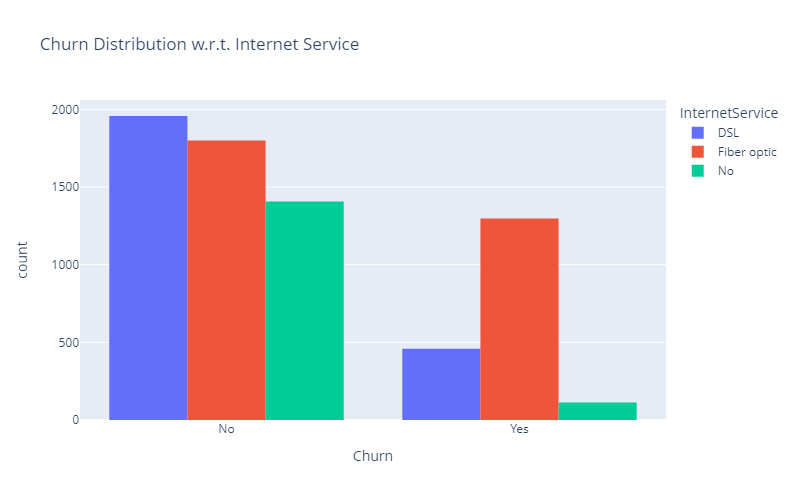

In [27]:
fig = px.histogram(df, x='Churn', color='InternetService', barmode='group', title='Churn Distribution w.r.t. Internet Service')
fig.update_layout(width=700, height=500)
fig.show()

根据上图：

1、使用光纤服务（Fiber Optic）的用户数量是最多的。

2、光纤用户流失率高于使用 DSL 服务的用户，这表明用户群体对光纤类型的互联网不满意。

### （4）是否订购在线安全服务与流失率之间的关系

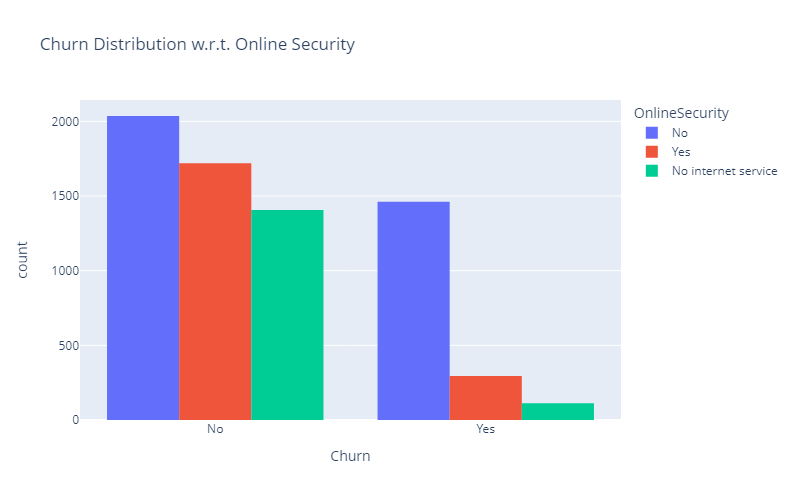

In [28]:
fig = px.histogram(df, x='Churn', color='OnlineSecurity', barmode='group', title='Churn Distribution w.r.t. Online Security')
fig.update_layout(width=700, height=500)
fig.show()

根据上图：

流失的客户中，大部分未订购在线安全服务。

### （5）是否订购技术支持服务与流失率之间的关系

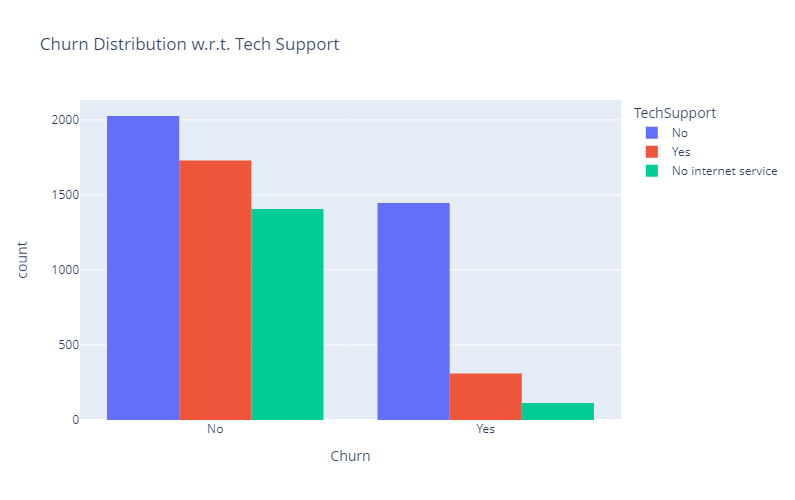

In [29]:
fig = px.histogram(df, x='Churn', color='TechSupport', barmode='group', title='Churn Distribution w.r.t. Tech Support')
fig.update_layout(width=700, height=500)
fig.show()

根据上图：

未订购技术支持服务的客户更容易流失。

## 4.3、合同属性层面可视化分析

### （1）客户的合同期限与客户流失率之间的关系

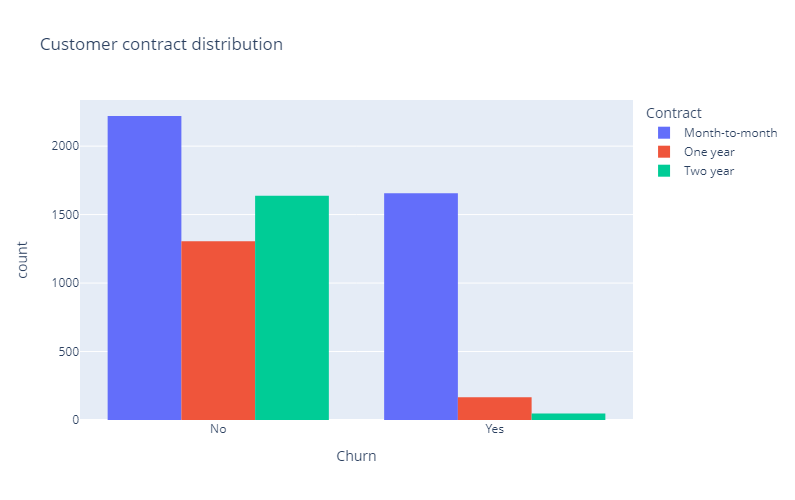

In [30]:
fig  = px.histogram(df, x='Churn', color='Contract', title='Customer contract distribution', barmode='group')
fig.update_layout(width=700, height=500)
fig.show()

根据上图：

1、流失客户中，大部分签署的都是月度合同。

2、签署月度合同中，有 43% 的用户流失了；签署年度合同的用户中，有 11% 的用户流失了；在签署两年度合同的用户中，有 3% 的用户流失了。

### （2）用户付款方式与客户流失率之间的关系

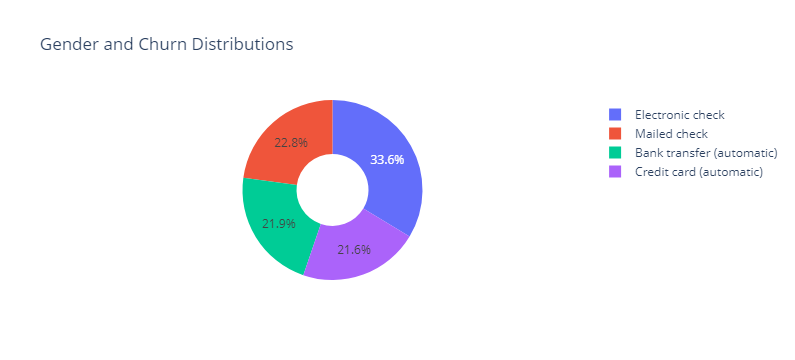

In [31]:
labels = df['PaymentMethod'].value_counts().index
values = df['PaymentMethod'].value_counts()

fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=values, hole=0.4))
fig.update_layout(title_text='Gender and Churn Distributions')
fig.show()


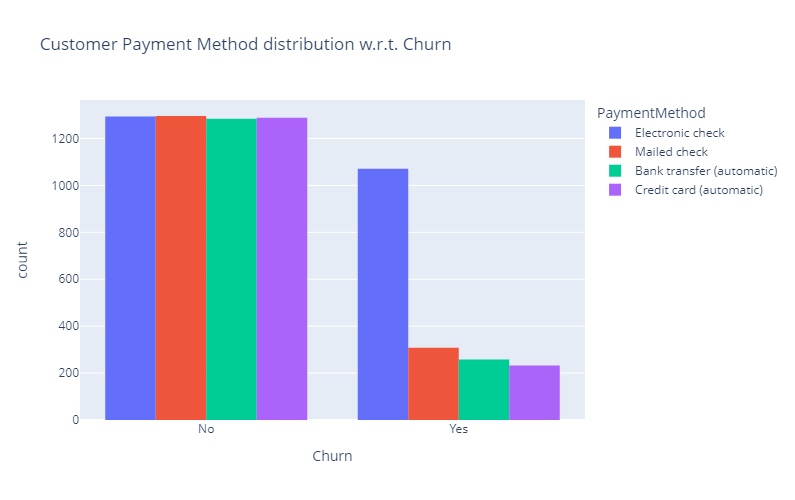

In [32]:
fig = px.histogram(df, x='Churn', color='PaymentMethod', title='Customer Payment Method distribution w.r.t. Churn', barmode='group')
fig.update_layout(width=700, height=500)
fig.show()

根据上图：

1、流失客户群体中，大部分客户使用的是电子支票作为支付方式。可能是电子支票支付用户体验欠佳。

2、其他支付方式导致的客户流失差别不大。

### （3）客户账单是否无纸化与客户流失之间的关系

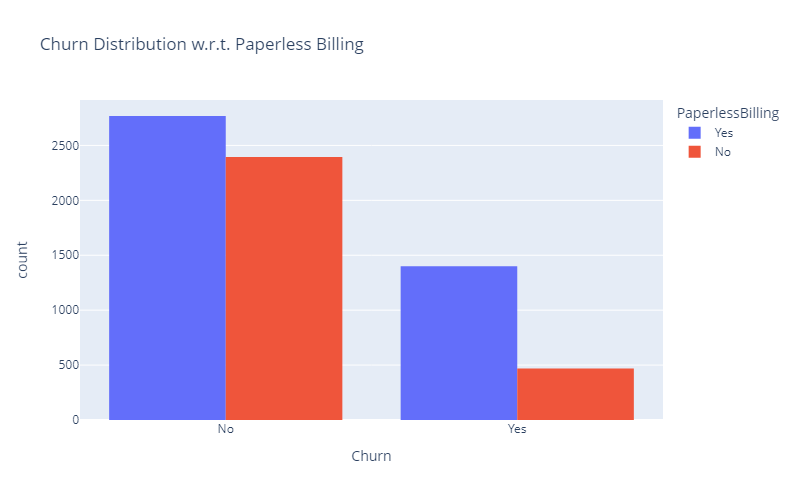

In [33]:
fig = px.histogram(df, x='Churn', color='PaperlessBilling', title='Churn Distribution w.r.t. Paperless Billing', barmode='group')
fig.update_layout(width=700, height=500)
fig.show()

根据上图：使用无纸化账单服务的用户更容易流失。

### （4）客户月消费金额与客户流失之间的关系

Text(0.5, 1.0, 'Distribution of mothly charges by churn')

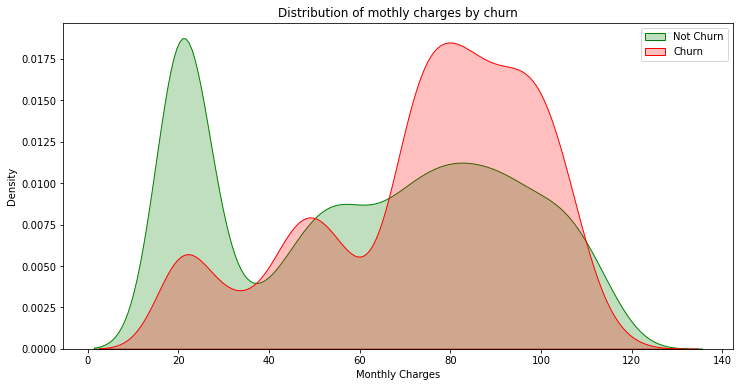

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))  

# 非流失用户 - 用绿色代替
ax = sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], color='green', shade=True)
# 流失用户 - 用红色代替
ax = sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], color='red', shade=True)

ax.legend(['Not Churn', 'Churn'], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of mothly charges by churn')

根据上图：

1、月消费金额越高的用户，越容易流失。

2、月消费金额在（70元， 110元）之间的客户流失的最多。

### （5）客户总消费金额与客户流失之间的关系

Text(0.5, 1.0, 'Distribution of total charges by churn')

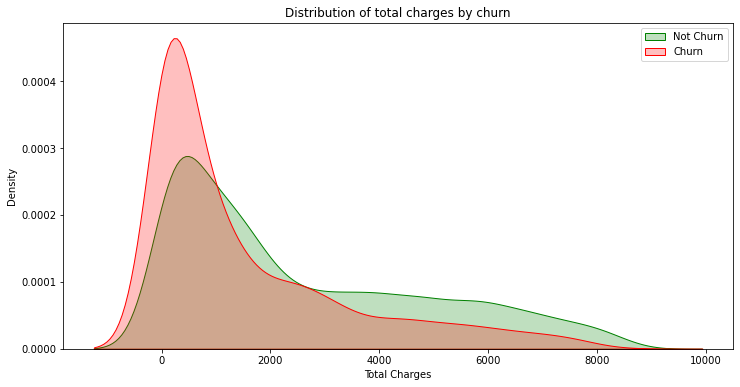

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))  

# 非流失用户 - 用绿色代替
ax = sns.kdeplot(df[df['Churn'] == 'No']['TotalCharges'], color='green', shade=True)
# 流失用户 - 用红色代替
ax = sns.kdeplot(df[df['Churn'] == 'Yes']['TotalCharges'], color='red', shade=True)

ax.legend(['Not Churn', 'Churn'], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

根据上图：
客户总消费金额越高，流失率越低。

# 5、数据处理

## 5.1、将数据集划分为训练集和测试集

In [36]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype == 'object':
        # LabelEncoder 会将 obejcet 类型的数据按顺序进行编码，如 0/1/2/3......
        # OneHotEncoder 会将数据转为 OneHot 编码
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [37]:
df = df.apply(lambda x:object_to_int(x))

In [38]:
df.head() # 全部转为数字格式

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [39]:
df.info() # 全部转为数字格式

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int32  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  


In [40]:
# 查看相关系数
df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

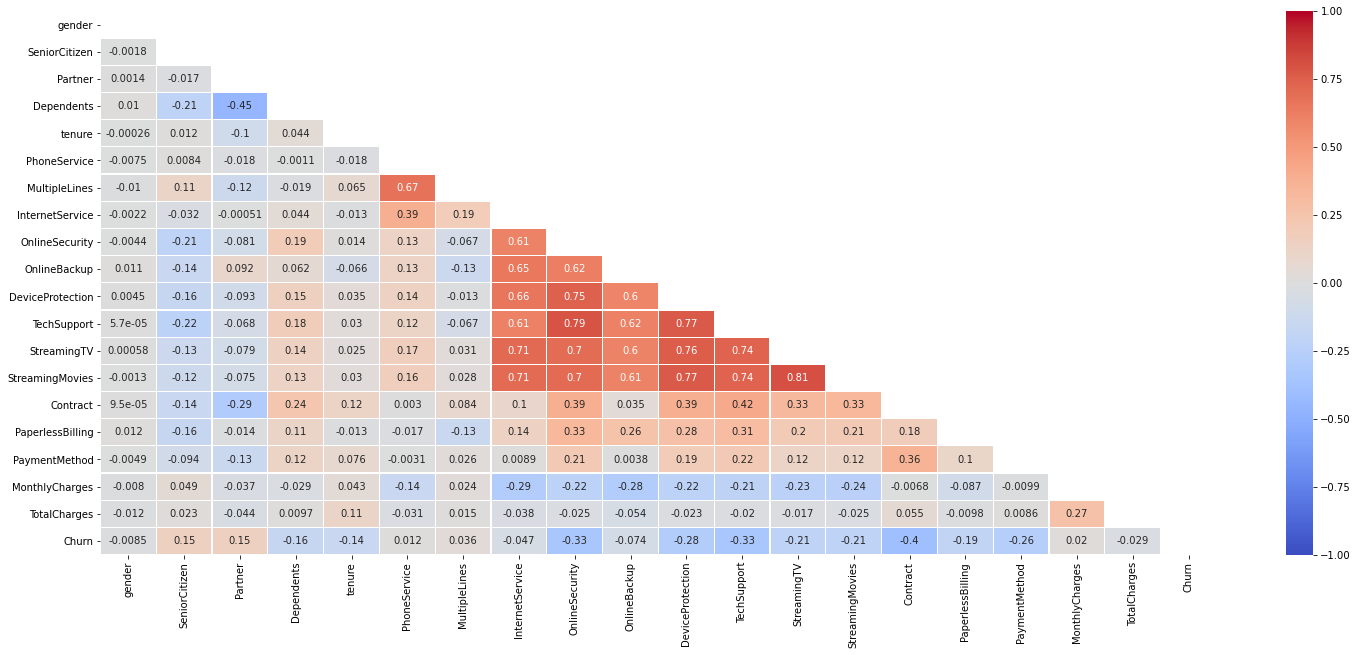

In [41]:
# 绘制热图
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x:pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [42]:
X = df.drop(columns=['Churn'])

In [43]:
y = df['Churn'].values

In [44]:
pd.DataFrame(y).value_counts() / pd.DataFrame(y).value_counts().sum() # SMOTE 采样前

0    0.734215
1    0.265785
dtype: float64

In [45]:
X.shape # SMOTE 采样前

(7032, 19)

In [46]:
'''
以下采取上采样方式对少数类数据进行填补
'''
sm = SMOTE(random_state=40) # 实例化
X, y = sm.fit_sample(X, y)

In [47]:
pd.DataFrame(y).value_counts() / pd.DataFrame(y).value_counts().sum() # SMOTE 采样后

0    0.5
1    0.5
dtype: float64

In [48]:
X.shape # SMOTE 采样后

(10326, 19)

In [49]:
# stratify=y : 确保训练集和测试集都按照 y 中 0/1 的比例进行抽样
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

In [50]:
# 查看连续型变量的分布情况，决定是否需要做数据标准化

def distplot(feature, frame, color='r'):
    plt.figure(figsize=(10, 6))
    plt.title('Distribution for %s' % feature)
    ax = sns.distplot(frame[feature], color=color)

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



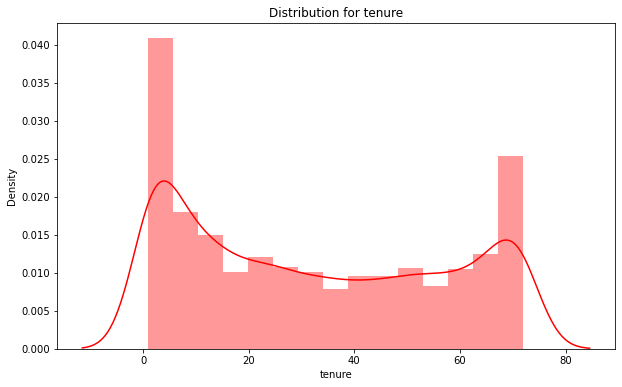

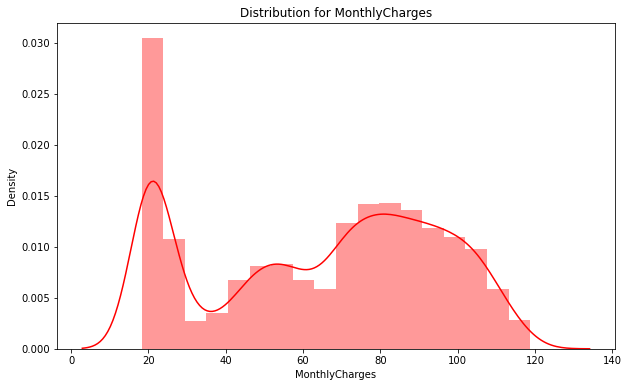

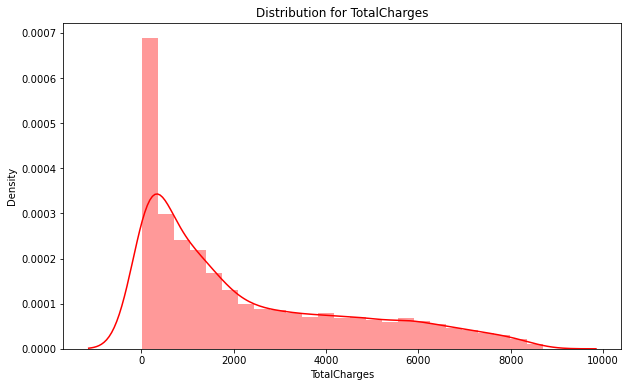

In [51]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feat in num_cols:
    distplot(feat, df)

In [52]:
'''
上述三个数值型特征值分布范围差异很大，因此先将上述三个特征值缩放至同一范围。
'''

'\n上述三个数值型特征值分布范围差异很大，因此先将上述三个特征值缩放至同一范围。\n'

## 5.2、对连续型变量进行标准化

In [53]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols]).astype('float64'), columns=num_cols)

In [54]:
df_std

tenure  MonthlyCharges  TotalCharges
0    -1.280248       -1.161694     -0.994194
1     0.064303       -0.260878     -0.173740
2    -1.239504       -0.363923     -0.959649
3     0.512486       -0.747850     -0.195248
4    -1.239504        0.196178     -0.940457
...        ...             ...           ...
7027 -0.343137        0.664868     -0.129180
7028  1.612573        1.276493      2.241056
7029 -0.872808       -1.170004     -0.854514
7030 -1.158016        0.319168     -0.872095
7031  1.368109        1.357932      2.012344

[7032 rows x 3 columns]

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



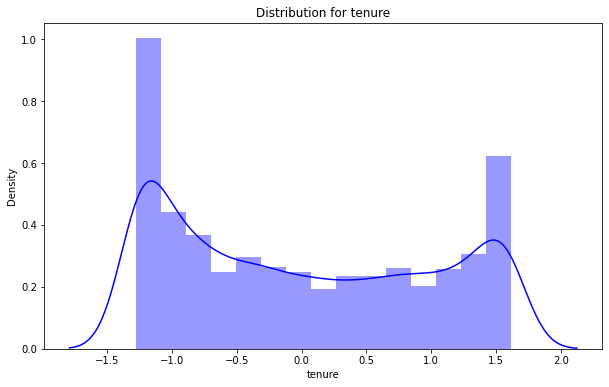

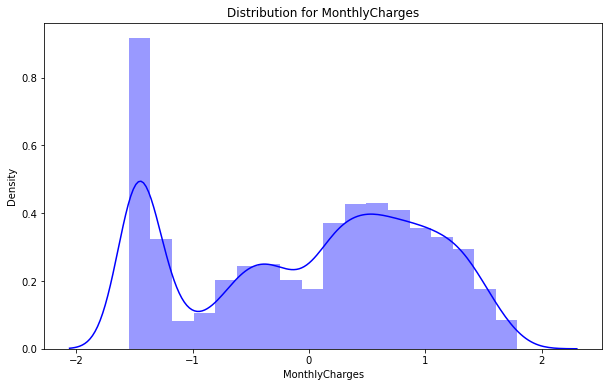

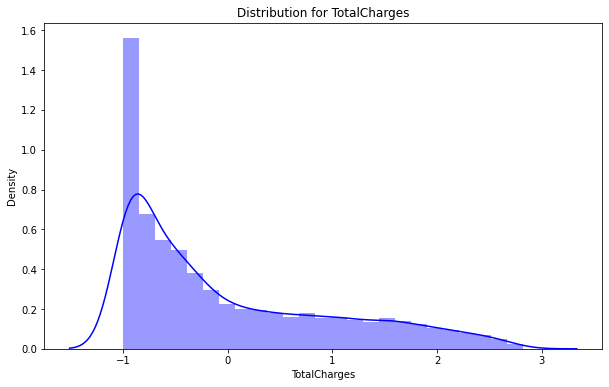

In [55]:
for feat in num_cols:
    distplot(feat, df_std, color='b')

In [56]:
df_std

tenure  MonthlyCharges  TotalCharges
0    -1.280248       -1.161694     -0.994194
1     0.064303       -0.260878     -0.173740
2    -1.239504       -0.363923     -0.959649
3     0.512486       -0.747850     -0.195248
4    -1.239504        0.196178     -0.940457
...        ...             ...           ...
7027 -0.343137        0.664868     -0.129180
7028  1.612573        1.276493      2.241056
7029 -0.872808       -1.170004     -0.854514
7030 -1.158016        0.319168     -0.872095
7031  1.368109        1.357932      2.012344

[7032 rows x 3 columns]

## 5.3、将训练集和测试集进行编码、标准化处理

将特征值进行处理：

1、数值型变量（tenure\MonthlyCharges\TotalCharges）进行标准化处理。

2、一类变量（PaymentMethod\Contract\InternetService）进行One-Hot编码，这三种特征值均有多种分类情况，不存在A>B的情况。

3、剩下的变量进行标签编码（已完成）。

In [57]:
cat_cols_ohe = ['PaymentMethod', 'Contract', 'InternetService'] # one-hot 编码
cat_cols_le = list(set(X_train.columns) - set(num_cols) - set(cat_cols_ohe))

### （1）标准化处理

In [58]:
scaler = StandardScaler()

In [59]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [60]:
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

### （2）one-hot 编码处理

In [61]:
X_train[cat_cols_ohe] = X_train[cat_cols_ohe].astype('object')
X_test[cat_cols_ohe] = X_test[cat_cols_ohe].astype('object')

X_train = pd.get_dummies(X_train, columns=cat_cols_ohe)
X_test = pd.get_dummies(X_test, columns=cat_cols_ohe)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



# 6、模型评估及结果预测

## 6.1、KNN算法

In [62]:
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test, y_test)

print('KNN accuracy:', accuracy_knn)

KNN accuracy: 0.7985797288573273


In [63]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78      1549
           1       0.76      0.88      0.81      1549

    accuracy                           0.80      3098
   macro avg       0.81      0.80      0.80      3098
weighted avg       0.81      0.80      0.80      3098



## 6.2、SVC

In [64]:
svc_model = SVC(random_state=1)
svc_model.fit(X_train, y_train)
predicted_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test, y_test)
print("SVC accuracy is:", accuracy_svc)

SVC accuracy is: 0.8202065848934796


In [65]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1549
           1       0.82      0.82      0.82      1549

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098



## 6.3、随机森林


In [66]:
model_rf = RandomForestClassifier(n_estimators=10, oob_score=True, n_jobs=-1, random_state=40, max_features='auto', max_leaf_nodes=30)
model_rf.fit(X_train, y_train)
predicted_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_test))

0.8098773402194964


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



In [67]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1549
           1       0.79      0.85      0.82      1549

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098



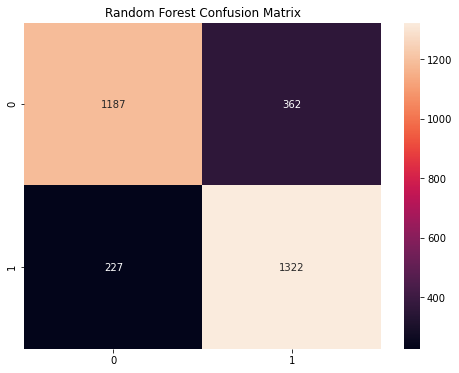

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predicted_test), annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

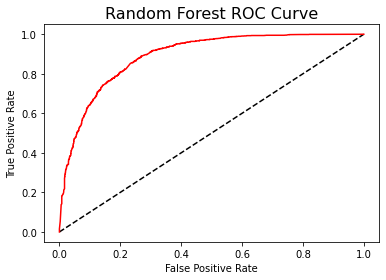

In [69]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', fontsize=16)
plt.show()

## 6.4、逻辑回归

In [70]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
accuracy_lr = lr_model.score(X_test, y_test)
print('Logistic Regression accuracy is:', accuracy_lr)

Logistic Regression accuracy is: 0.8092317624273725


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [71]:
lr_pred = lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1549
           1       0.78      0.86      0.82      1549

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098



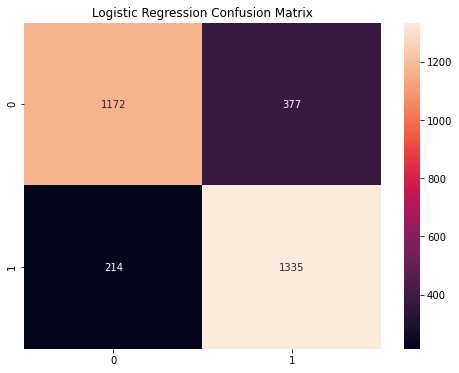

In [72]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

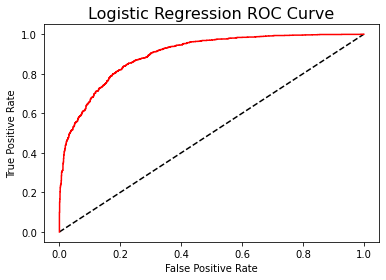

In [73]:
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Logistic Regression', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.show()

## 6.5、决策树

In [74]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
predic_dt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test, y_test)
print('Decision Tree accuracy is :', accuracy_dt)

Decision Tree accuracy is : 0.7679147837314396


In [75]:
print(classification_report(y_test, predic_dt_y))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1549
           1       0.79      0.74      0.76      1549

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098



## 8.6 AdaBoost 分类器

In [76]:
a_model = AdaBoostClassifier()
a_model.fit(X_train, y_train)
a_preds = a_model.predict(X_test)
print('AdaBoost Classifier accracy is :', metrics.accuracy_score(y_test, a_preds))

AdaBoost Classifier accracy is : 0.8198837959974177


In [77]:
print(classification_report(y_test, a_preds))


              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1549
           1       0.78      0.89      0.83      1549

    accuracy                           0.82      3098
   macro avg       0.83      0.82      0.82      3098
weighted avg       0.83      0.82      0.82      3098



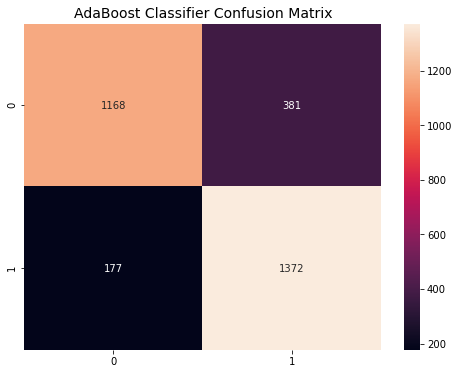

In [78]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, a_preds), annot=True,fmt = "d")
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

## 6.5、梯度提升分类器

In [79]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", metrics.accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8273079406068431


In [80]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1549
           1       0.81      0.86      0.83      1549

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098



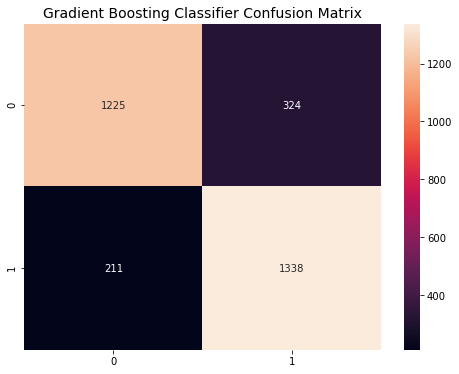

In [81]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, gb_pred),annot=True,fmt = "d")
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

## 6.6、构建投票分类器

In [82]:
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
# Soft Voting Classifier：将所有模型预测样本为某一类别的概率的平均值作为标准，概率最高的对应的类型为最终的预测结果
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft') 
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)

print("Final Accuracy Score is : ", metrics.accuracy_score(y_test, predictions))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Final Accuracy Score is :  0.8273079406068431


In [83]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1549
           1       0.80      0.88      0.84      1549

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098



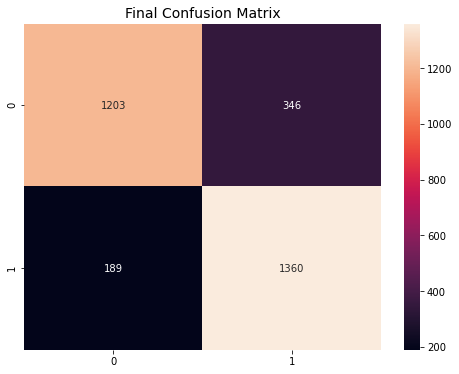

In [84]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True,fmt = "d")
    
plt.title("Final Confusion Matrix",fontsize=14)
plt.show()